<a href="https://colab.research.google.com/github/gabikohen/Final-Project-/blob/master/TESLA_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
## Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold


from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,classification_report


from sklearn import set_config
set_config(transform_output='pandas')



In [114]:
archivo = "/content/drive/MyDrive/Colab Notebooks/Coding dojo/Ejercicio practico presentacion/Tesla Dataset project - Sheet1 (1).csv"
tesla_df = pd.read_csv(archivo)

Quiero saber la información  del dataset

In [115]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1004 non-null   object 
 1   Close             1004 non-null   float64
 2   Open              1004 non-null   float64
 3   Open Comparation  1004 non-null   float64
 4   Price Variation   1004 non-null   object 
 5   High              1004 non-null   float64
 6   Low               1004 non-null   float64
 7   Volumen           1004 non-null   object 
 8   Unamed 8          0 non-null      float64
dtypes: float64(6), object(3)
memory usage: 70.7+ KB


In [116]:
tesla_df.describe()

,Close,Open,Open Comparation,High,Low,Unamed 8
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,0.0
mean,214.065189,214.121135,214.330488,219.103486,208.889910,NaN
std,82.529725,82.692842,82.529932,84.365836,80.808822,NaN
min,24.080000,24.980000,24.980000,26.990000,23.370000,NaN
25%,167.952500,167.787500,168.265000,173.742500,164.500000,NaN
50%,226.135000,226.320000,226.460000,231.650000,222.110000,NaN
75%,266.740000,267.610000,267.610000,273.482500,261.147500,NaN
max,409.970000,411.470000,411.470000,414.500000,405.670000,NaN


Aclaración: En este dataset agrega las columnas open comp que compara como abrio el precio de la acción con el dia anterior y price varaciaon es el resultado la comparacion de la dos columnas si es mayor Tiene un resultado SUBE y si es menor tiene un resultado BAJA

Visualizo las primeras 5 filas

In [117]:
tesla_df.head()

,Date,Close,Open,Open Comparation,Price Variation,High,Low,Volumen,Unamed 8
0,2/3/2020,52.00,44.91,58.86,SUBE,52.41,44.90,"708,502,469",NaN
1,2/4/2020,59.14,58.86,54.88,BAJA,64.60,55.59,"914,081,390",NaN
2,2/5/2020,48.98,54.88,46.66,BAJA,56.40,46.94,"726,357,568",NaN
3,2/6/2020,49.93,46.66,48.70,SUBE,53.06,45.80,"598,211,284",NaN
4,2/7/2020,49.87,48.70,53.33,SUBE,51.32,48.67,"255,952,789",NaN


In [118]:
tesla_df.shape

(1004, 9)

Elimino

In [119]:
tesla_df.head()

,Date,Close,Open,Open Comparation,Price Variation,High,Low,Volumen,Unamed 8
0,2/3/2020,52.00,44.91,58.86,SUBE,52.41,44.90,"708,502,469",NaN
1,2/4/2020,59.14,58.86,54.88,BAJA,64.60,55.59,"914,081,390",NaN
2,2/5/2020,48.98,54.88,46.66,BAJA,56.40,46.94,"726,357,568",NaN
3,2/6/2020,49.93,46.66,48.70,SUBE,53.06,45.80,"598,211,284",NaN
4,2/7/2020,49.87,48.70,53.33,SUBE,51.32,48.67,"255,952,789",NaN


Visualizo las ultimas 5 columnas del dataset

In [120]:
tesla_df.tail()

,Date,Close,Open,Open Comparation,Price Variation,High,Low,Volumen,Unamed 8
999,12/21/2023,254.50,251.90,256.76,SUBE,254.80,248.55,"109,594,203",NaN
1000,12/22/2023,252.54,256.76,254.49,BAJA,258.22,251.37,"93,370,086",NaN
1001,12/26/2023,256.61,254.49,258.35,SUBE,257.97,252.91,"86,892,383",NaN
1002,12/27/2023,261.44,258.35,263.66,SUBE,263.34,257.52,"106,494,398",NaN
1003,12/28/2023,253.18,263.66,255.10,BAJA,265.13,252.71,"113,619,906",NaN


Elimino la columna Unnamed: 8

In [121]:
tesla_df.drop('Unamed 8', axis=1, inplace=True)

In [122]:
print('Hay', tesla_df.duplicated().sum(), 'duplicados')

Hay 19 duplicados


Elimino duplicados

In [123]:
tesla_df.drop_duplicates(inplace=True)

Confirmo que elimine duplicados

In [124]:
print('Hay', tesla_df.duplicated().sum(), 'duplicados')

Hay 0 duplicados


Veirfico si tengo nulls, Tengo en todas las columnas 0 entonces no tengo nulos

In [125]:
tesla_df.isnull().sum()

Date                0
Close               0
Open                0
Open Comparation    0
Price Variation     0
High                0
Low                 0
Volumen             0
dtype: int64

In [126]:
tesla_df["Open Comparation"].unique()

array([ 58.86,  54.88,  46.66,  48.7 ,  53.33,  51.25,  51.86,  49.46,
        52.48,  56.11,  61.57,  60.8 ,  60.47,  55.93,  56.6 ,  52.17,
        48.67,  41.98,  47.42,  53.67,  50.93,  48.25,  46.  ,  40.36,
        43.96,  42.68,  38.73,  39.67,  31.3 ,  29.33,  25.93,  24.98,
        29.21,  28.91,  31.82,  36.35,  36.49,  33.67,  34.02,  33.42,
        33.6 ,  32.07,  33.97,  34.08,  36.33,  36.95,  37.47,  39.34,
        46.6 ,  49.47,  47.8 ,  51.49,  48.85,  46.93,  48.51,  47.39,
        49.17,  53.04,  52.68,  57.01,  50.33,  46.73,  52.65,  51.77,
        51.81,  52.92,  52.7 ,  55.13,  54.72,  52.  ,  52.69,  55.19,
        54.34,  54.7 ,  54.4 ,  54.81,  55.63,  54.23,  53.92,  57.2 ,
        59.65,  59.21,  59.33,  58.52,  61.27,  62.67,  66.13,  66.01,
        65.33,  61.19,  67.46,  65.85,  66.87,  67.52,  66.66,  66.59,
        66.27,  63.62,  66.32,  64.6 ,  67.1 ,  72.2 ,  81.43,  85.11,
        93.67,  93.13,  93.07, 110.6 , 103.73, 102.87,  98.48, 100.9 ,
      

Lo modelos no trabajan con tipo de dato fecha entonces voy a crear 3 columnas nuevas en formato integro

In [127]:
tesla_df["Day"] = pd.DatetimeIndex(tesla_df["Date"]).day
tesla_df["Month"] = pd.DatetimeIndex(tesla_df["Date"]).month
tesla_df["Year"] = pd.DatetimeIndex(tesla_df["Date"]).year

Visualizo mi como quedo mi dataset con las columnas nuevas

In [128]:
tesla_df.head()

,Date,Close,Open,Open Comparation,Price Variation,High,Low,Volumen,Day,Month,Year
0,2/3/2020,52.00,44.91,58.86,SUBE,52.41,44.90,"708,502,469",3,2,2020
1,2/4/2020,59.14,58.86,54.88,BAJA,64.60,55.59,"914,081,390",4,2,2020
2,2/5/2020,48.98,54.88,46.66,BAJA,56.40,46.94,"726,357,568",5,2,2020
3,2/6/2020,49.93,46.66,48.70,SUBE,53.06,45.80,"598,211,284",6,2,2020
4,2/7/2020,49.87,48.70,53.33,SUBE,51.32,48.67,"255,952,789",7,2,2020


**Informacion de columnas**

In [129]:
tesla_df["Close"].unique()

array([ 52.  ,  59.14,  48.98,  49.93,  49.87,  51.42,  51.63,  51.15,
        53.6 ,  53.34,  57.23,  61.16,  59.96,  60.07,  55.59,  53.33,
        51.92,  45.27,  44.53,  49.57,  49.7 ,  49.97,  48.3 ,  46.9 ,
        40.53,  43.02,  42.28,  37.37,  36.44,  29.67,  28.68,  24.08,
        28.51,  28.5 ,  28.95,  33.67,  35.95,  35.21,  34.29,  33.48,
        34.93,  32.1 ,  30.3 ,  32.  ,  34.42,  36.36,  36.59,  38.2 ,
        43.4 ,  47.33,  48.66,  49.68,  50.26,  49.76,  45.78,  48.81,
        47.04,  48.34,  53.25,  51.27,  53.37,  52.13,  46.75,  50.75,
        51.21,  52.17,  54.63,  54.09,  53.96,  52.73,  53.56,  53.28,
        54.24,  53.87,  54.37,  55.17,  54.46,  54.59,  54.68,  53.72,
        55.67,  59.87,  58.77,  58.86,  57.63,  59.04,  63.33,  62.71,
        68.34,  64.86,  62.35,  66.06,  65.48,  66.12,  66.93,  66.73,
        66.29,  66.79,  64.06,  65.73,  63.98,  67.29,  71.99,  74.64,
        80.58,  91.44,  92.66,  91.06,  92.95, 102.98,  99.8 , 101.12,
      

In [130]:
tesla_df["Open"].unique()

array([ 44.91,  58.86,  54.88,  46.66,  48.7 ,  53.33,  51.25,  51.86,
        49.46,  52.48,  56.11,  61.57,  60.8 ,  60.47,  55.93,  56.6 ,
        52.17,  48.67,  41.98,  47.42,  53.67,  50.93,  48.25,  46.  ,
        40.36,  43.96,  42.68,  38.73,  39.67,  31.3 ,  29.33,  25.93,
        24.98,  29.21,  28.91,  31.82,  36.35,  36.49,  33.67,  34.02,
        33.42,  33.6 ,  32.07,  33.97,  34.08,  36.33,  36.95,  37.47,
        39.34,  46.6 ,  49.47,  47.8 ,  51.49,  48.85,  46.93,  48.51,
        47.39,  49.17,  53.04,  52.68,  57.01,  50.33,  46.73,  52.65,
        51.77,  51.81,  52.92,  52.7 ,  55.13,  54.72,  52.  ,  52.69,
        55.19,  54.34,  54.7 ,  54.4 ,  54.81,  55.63,  54.23,  53.92,
        57.2 ,  59.65,  59.21,  59.33,  58.52,  61.27,  62.67,  66.13,
        66.01,  65.33,  61.19,  67.46,  65.85,  66.87,  67.52,  66.66,
        66.59,  66.27,  63.62,  66.32,  64.6 ,  67.1 ,  72.2 ,  81.43,
        85.11,  93.67,  93.13,  93.07, 110.6 , 103.73, 102.87,  98.48,
      

In [131]:
tesla_df["Open Comparation"].unique()

array([ 58.86,  54.88,  46.66,  48.7 ,  53.33,  51.25,  51.86,  49.46,
        52.48,  56.11,  61.57,  60.8 ,  60.47,  55.93,  56.6 ,  52.17,
        48.67,  41.98,  47.42,  53.67,  50.93,  48.25,  46.  ,  40.36,
        43.96,  42.68,  38.73,  39.67,  31.3 ,  29.33,  25.93,  24.98,
        29.21,  28.91,  31.82,  36.35,  36.49,  33.67,  34.02,  33.42,
        33.6 ,  32.07,  33.97,  34.08,  36.33,  36.95,  37.47,  39.34,
        46.6 ,  49.47,  47.8 ,  51.49,  48.85,  46.93,  48.51,  47.39,
        49.17,  53.04,  52.68,  57.01,  50.33,  46.73,  52.65,  51.77,
        51.81,  52.92,  52.7 ,  55.13,  54.72,  52.  ,  52.69,  55.19,
        54.34,  54.7 ,  54.4 ,  54.81,  55.63,  54.23,  53.92,  57.2 ,
        59.65,  59.21,  59.33,  58.52,  61.27,  62.67,  66.13,  66.01,
        65.33,  61.19,  67.46,  65.85,  66.87,  67.52,  66.66,  66.59,
        66.27,  63.62,  66.32,  64.6 ,  67.1 ,  72.2 ,  81.43,  85.11,
        93.67,  93.13,  93.07, 110.6 , 103.73, 102.87,  98.48, 100.9 ,
      

In [132]:
tesla_df["Price Variation"].unique()

array(['SUBE', 'BAJA'], dtype=object)

In [133]:
tesla_df["High"].unique()

array([ 52.41,  64.6 ,  56.4 ,  53.06,  51.32,  54.67,  52.23,  52.65,
        54.53,  54.2 ,  57.33,  62.99,  60.8 ,  60.87,  57.57,  57.11,
        54.22,  49.32,  46.03,  49.58,  53.8 ,  51.1 ,  49.72,  47.13,
        44.2 ,  44.53,  43.57,  39.63,  40.5 ,  32.99,  31.46,  26.99,
        30.13,  31.8 ,  29.47,  34.25,  37.13,  37.33,  35.05,  34.44,
        36.2 ,  34.26,  32.95,  34.37,  34.73,  37.67,  37.15,  38.35,
        43.47,  49.46,  50.21,  50.63,  51.66,  51.04,  50.22,  48.93,
        48.72,  53.3 ,  53.67,  53.55,  57.99,  51.52,  50.8 ,  53.26,
        53.09,  54.93,  56.22,  55.07,  53.56,  55.65,  54.8 ,  55.5 ,
        55.45,  55.64,  55.18,  54.98,  55.67,  59.93,  60.58,  59.86,
        59.72,  59.1 ,  63.33,  63.63,  68.5 ,  67.93,  65.87,  66.59,
        67.53,  67.  ,  67.95,  67.73,  67.26,  67.47,  66.73,  65.73,
        66.33,  67.33,  72.51,  75.69,  81.87,  91.85,  95.3 ,  94.48,
        93.9 , 103.26, 119.67, 106.  , 103.33, 102.11, 102.5 , 110.  ,
      

In [134]:
tesla_df["Low"].unique()

array([ 44.9 ,  55.59,  46.94,  45.8 ,  48.67,  50.16,  50.53,  50.89,
        49.  ,  52.37,  55.49,  60.07,  57.33,  58.7 ,  54.81,  52.47,
        51.74,  44.6 ,  40.77,  45.78,  47.74,  48.32,  47.87,  45.62,
        40.33,  40.53,  40.87,  36.42,  33.47,  29.48,  26.4 ,  23.37,
        23.9 ,  28.39,  27.37,  31.6 ,  34.07,  34.15,  32.94,  32.75,
        33.13,  31.67,  29.76,  31.23,  33.2 ,  35.49,  35.56,  37.14,
        38.7 ,  46.16,  47.33,  47.11,  49.84,  47.48,  44.92,  45.91,
        46.88,  46.55,  50.45,  52.21,  50.9 ,  45.54,  46.53,  50.81,
        50.74,  51.49,  52.33,  53.87,  50.93,  52.44,  53.59,  53.74,
        54.12,  53.07,  54.13,  54.38,  53.45,  53.61,  56.94,  58.07,
        58.67,  57.23,  57.75,  60.61,  61.6 ,  65.5 ,  64.8 ,  60.84,
        60.57,  64.16,  66.3 ,  66.09,  66.  ,  66.27,  63.54,  62.48,
        63.66,  63.23,  66.92,  72.03,  79.04,  84.4 ,  89.11,  87.42,
        90.09,  91.73,  98.07,  95.4 ,  97.13,  97.73,  99.33,  99.2 ,
      

Elimino la columna Data

In [135]:
tesla_df.drop('Date', axis=1, inplace=True)

Confirmo que elimne la columna data

In [136]:
print(tesla_df.columns)

Index(['Close', 'Open', 'Open Comparation', 'Price Variation', 'High', 'Low',
       'Volumen', 'Day', 'Month', 'Year'],
      dtype='object')


Antes de graficar voy convertir las columnas price variation y volume a numericas

In [137]:
tesla_df['Price Variation'].replace({'BAJA': 0, 'SUBE': 1},inplace=True)

In [138]:
tesla_df['Price Variation'].unique()

array([1, 0])

In [139]:
tesla_df['Volumen'].unique()

array(['708,502,469', '914,081,390', '726,357,568', '598,211,284',
       '255,952,789', '370,337,384', '175,462,042', '180,337,042',
       '394,340,263', '235,405,655', '250,475,524', '381,344,398',
       '264,523,353', '215,091,741', '227,882,390', '259,357,189',
       '212,307,591', '364,157,384', '368,462,504', '302,924,837',
       '386,759,983', '225,734,690', '162,789,893', '189,943,792',
       '256,106,089', '233,916,590', '201,203,841', '283,635,753',
       '339,603,765', '307,341,901', '359,918,684', '356,792,384',
       '452,931,895', '424,282,511', '246,818,254', '343,427,505',
       '318,341,266', '261,331,189', '215,661,141', '179,971,042',
       '266,572,338', '200,297,691', '297,876,467', '338,431,185',
       '223,527,590', '268,796,673', '189,840,292', '204,749,991',
       '337,131,285', '458,647,630', '353,654,984', '309,867,871',
       '196,923,441', '221,195,540', '303,136,307', '213,372,456',
       '198,550,491', '198,564,141', '310,221,571', '228,329,3

## **Gráficos **

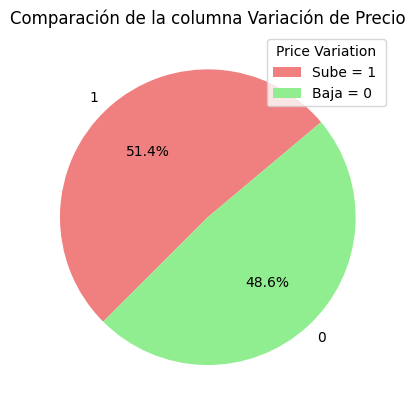

In [140]:

price_variation = tesla_df["Price Variation"].value_counts()

colors = ['lightcoral', 'lightgreen']
plt.pie(price_variation, labels=price_variation.index, autopct='%1.1f%%', startangle=40, colors=colors)
plt.legend(['Sube = 1 ', 'Baja = 0'], title="Price Variation", loc="upper right")
plt.title("Comparación de la columna Variación de Precio")
plt.show()


En este gráfico  podemos visualizar que al comparar la columna open con open comparation tenemos que variaon de los precios sube con 51,4% y los que bajan con 48,6 %. El numero cero reprensenta cuando baja y el 1 representa cuando sube

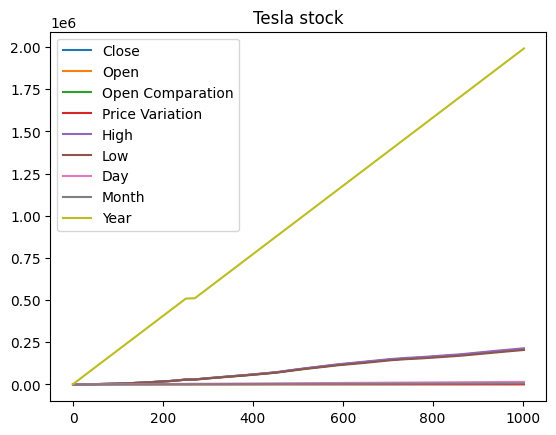

In [141]:
# Calcular los cambios acumulativos
cumulative_changes = tesla_df.cumsum()
cumulative_changes.plot()
plt.title('Tesla stock')
plt.show()

In [142]:
# Graficar los datos de apertura y cierre de Tesla
fig = px.line(tesla_df, x=tesla_df.Year, y=["Open","Close"], log_y=True)

# Actualizar el diseño del gráfico con un título
fig.update_layout(title=dict(text="All Years Open-Close Price of Tesla Stock", font=dict(size=22)))

# Mostrar el gráfico
fig.show()

In [191]:
# Calcular la diferencia entre los precios altos y bajos
tesla_df['Price_Difference'] = tesla_df['High'] - tesla_df['Low']

# Crear un gráfico de barras apiladas
fig = go.Figure()

# Agregar la diferencia de precios altos y bajos como barras
fig.add_trace(go.Bar(x=tesla_df['Year'], y=tesla_df['Price_Difference'], name='Price Difference',
                     marker_color='pink'))

# Agregar los precios altos como líneas para referencia
fig.add_trace(go.Scatter(x=tesla_df['Year'], y=tesla_df['High'], mode='lines', name='High Price',
                         line=dict(color='pink', width=3)))

# Agregar los precios bajos como líneas para referencia
fig.add_trace(go.Scatter(x=tesla_df['Year'], y=tesla_df['Low'], mode='lines', name='Low Price',
                         line=dict(color='green', width=3)))

# Actualizar el diseño del gráfico con un título y etiquetas de los ejes
fig.update_layout(title='Price Difference Between High and Low of Tesla Stock Over the Years',
                  xaxis_title='Year', yaxis_title='Price',
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
                  barmode='relative')

# Mostrar el gráfico
fig.show()


<ipython-input-144-b4d614214b6d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



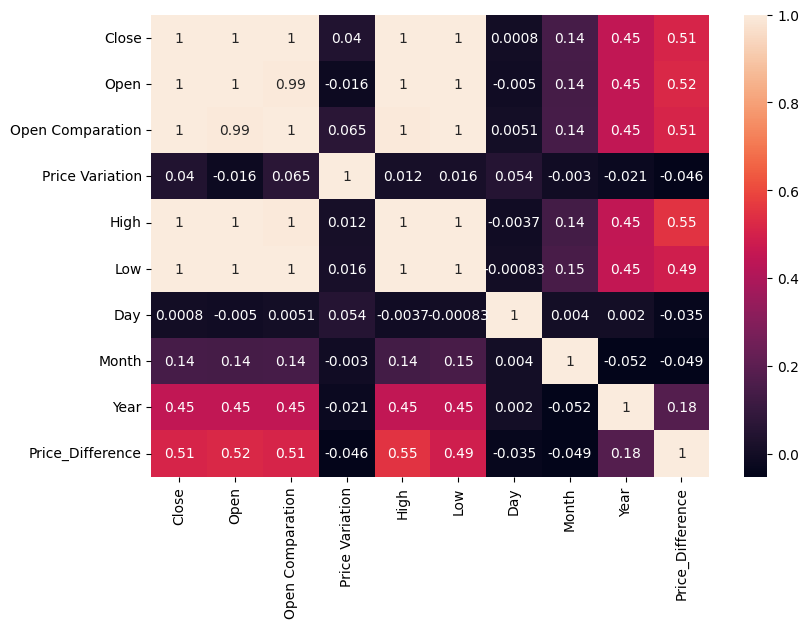

In [144]:
corr = tesla_df.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr,annot=True);


El mapa de calor que me enviaste muestra la correlación entre las diferentes variables de un conjunto de datos de precios de automóviles Tesla. Las variables son:

Close: El precio de cierre de  un automóvil Tesla.
Open: El precio de apertura de un automóvil Tesla.
Open Comparation: La comparación del precio de apertura de un automóvil Tesla con el precio de apertura del día anterior.
High: El precio más alto de un automóvil Tesla.
Low: El precio más bajo de un automóvil Tesla.
Day: El día de la semana.
Month: El mes.
Year: El año.


En general, el mapa de calor muestra que las variables están moderadamente correlacionadas entre sí. Las variables más correlacionadas son el precio y la comparación del precio de apertura, con una correlación de 0,99. Esto significa que el precio del automóvil Tesla es muy similar al precio de apertura del automóvil Tesla.

Otras variables con una correlación relativamente alta son el precio y el precio más alto (0,97), el precio y el precio más bajo (0,97), y el precio y el día de la semana (0,47). Esto significa que el precio del automóvil Tesla es similar al precio más alto, al precio más bajo y al día de la semana.

Las variables con una correlación relativamente baja son el precio y el mes (0,18) y el precio y el año (0,0). Esto significa que el precio del automóvil Tesla no está relacionado con el mes o el año.

#Definir las características (X) y el objetivo (y)

In [145]:
print(tesla_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 1003
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             985 non-null    float64
 1   Open              985 non-null    float64
 2   Open Comparation  985 non-null    float64
 3   Price Variation   985 non-null    int64  
 4   High              985 non-null    float64
 5   Low               985 non-null    float64
 6   Volumen           985 non-null    object 
 7   Day               985 non-null    int64  
 8   Month             985 non-null    int64  
 9   Year              985 non-null    int64  
 10  Price_Difference  985 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 92.3+ KB
None


In [146]:
columns = ['Close', 'Open','Day', 'Month', 'Year']
X = tesla_df[columns]
y = tesla_df["Price Variation"]


#Realizar train test split (70/30)


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
#Revisar estructura de las características (X) - train
X_train.shape

(689, 5)

In [149]:
#Revisar estructura de las características (X) - test
X_test.shape

(296, 5)

In [150]:
#Revisar estructura del objetivo (y) - train
y_train.shape

(689,)

In [151]:
#Revisar estructura del objetivo (y) - test
y_test.shape

(296,)

In [152]:
#Crear un objeto StandarScaler
standard_scaler = StandardScaler()

In [153]:
#Imputar "mean" en los valores faltantes de las columnas numéricas
imputer_num = SimpleImputer(strategy="mean")

In [154]:
#Aplicar preprocesamiento
preprocessing_pipeline = make_pipeline(imputer_num, standard_scaler)
preprocessing_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [155]:
#Entrenar preprocesamiento
preprocessing_pipeline.fit(X_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [156]:
#Transformar preprocesamiento - X_train
X_train_processed = preprocessing_pipeline.transform(X_train)

In [157]:
#Transformar preprocesamiento - X_test
X_test_processed = preprocessing_pipeline.transform(X_test)

In [158]:
#Visualizar resultados de X_train
X_train_processed=pd.DataFrame(X_train_processed, columns=X_train.columns)
X_train_processed

,Close,Open,Day,Month,Year
417,0.408661,0.337352,1.618499,0.373657,-0.472525
542,0.979437,0.745768,1.391543,-1.397784,0.414586
828,-0.365263,-0.385164,0.370244,-0.807304,1.301696
520,1.253533,1.305431,1.164588,-1.693024,0.414586
449,0.766225,0.747723,-0.197145,0.964137,-0.472525
...,...,...,...,...,...
106,-1.459558,-1.533445,-1.104967,0.078416,-1.359635
289,0.181946,0.277366,1.164588,-1.397784,-0.472525
879,0.852762,0.804654,-1.445400,0.078416,1.301696
454,1.075917,0.912653,0.597199,0.964137,-0.472525


LogisticRegression

In [159]:
logreg = LogisticRegression()
scaler = StandardScaler()
logreg_pipe = make_pipeline(scaler,logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [160]:
y_pred_logreg =logreg_pipe.predict(X_test)
print('Accuracy',[round(accuracy_score(y_test,y_pred_logreg),4)])
print('Recall',[round(recall_score(y_test,y_pred_logreg,average="macro"),4)])
print('Precision',[round(precision_score(y_test,y_pred_logreg,average="macro"),4)])
print('f1_score',[round(f1_score(y_test,y_pred_logreg,average="macro"),4)])

Accuracy [0.8108]
Recall [0.8069]
Precision [0.827]
f1_score [0.8069]


Report

In [161]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78       143
           1       0.76      0.92      0.83       153

    accuracy                           0.81       296
   macro avg       0.83      0.81      0.81       296
weighted avg       0.82      0.81      0.81       296



# **GridSearch**

L2

In [162]:
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2']
}


grid_search = GridSearchCV(logreg_pipe, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred_best = best_model.predict(X_test)

# Imprimir métricas de evaluación con el mejor modelo
print('Accuracy:', round(accuracy_score(y_test, y_pred_best), 4))
print('Recall:', round(recall_score(y_test, y_pred_best, average="macro"), 4))
print('Precision:', round(precision_score(y_test, y_pred_best, average="macro"), 4))
print('F1 Score:', round(f1_score(y_test, y_pred_best, average="macro"), 4))

Mejores parámetros: {'logisticregression__C': 100, 'logisticregression__penalty': 'l2'}
Accuracy: 0.8818
Recall: 0.8808
Precision: 0.8829
F1 Score: 0.8814


DecisionTreeClassifier

In [163]:
dtc = DecisionTreeClassifier(random_state = 42)
scaler = StandardScaler()
dtc_pipe = make_pipeline(scaler,dtc)
dtc_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [164]:
y_pred_dtc =dtc_pipe.predict(X_test)
print('Accuracy',[round(accuracy_score(y_test,y_pred_dtc),4)])
print('Recall',[round(recall_score(y_test,y_pred_dtc,average="macro"),4)])
print('Precision',[round(precision_score(y_test,y_pred_dtc,average="macro"),4)])
print('f1_score',[round(f1_score(y_test,y_pred_dtc,average="macro"),4)])

Accuracy [0.6419]
Recall [0.6438]
Precision [0.6451]
f1_score [0.6415]


Report

In [165]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65       143
           1       0.68      0.59      0.63       153

    accuracy                           0.64       296
   macro avg       0.65      0.64      0.64       296
weighted avg       0.65      0.64      0.64       296



GridSearch con  DecisionTreeClassifier

In [166]:
# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_dtc = best_model.predict(X_test)

# Evaluate the model using the specified metrics
accuracy = accuracy_score(y_test, y_pred_dtc)
recall = recall_score(y_test, y_pred_dtc, average="macro")
precision = precision_score(y_test, y_pred_dtc, average="macro")
f1 = f1_score(y_test, y_pred_dtc, average="macro")

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Accuracy on Test Set: {round(accuracy, 4)}")
print(f"Recall on Test Set: {round(recall, 4)}")
print(f"Precision on Test Set: {round(precision, 4)}")
print(f"F1 Score on Test Set: {round(f1, 4)}")

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on Test Set: 0.6115
Recall on Test Set: 0.6114
Precision on Test Set: 0.6113
F1 Score on Test Set: 0.6113


RandomForestClassifier

In [167]:
rfc = RandomForestClassifier(random_state=42)
scaler = StandardScaler()
rfc_pipe = make_pipeline(scaler,rfc)
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [168]:
y_pred_rfc =rfc_pipe.predict(X_test)
print('Accuracy',[round(accuracy_score(y_test,y_pred_rfc),4)])
print('Recall',[round(recall_score(y_test,y_pred_rfc,average="macro"),4)])
print('Precision',[round(precision_score(y_test,y_pred_rfc,average="macro"),4)])
print('f1_score',[round(f1_score(y_test,y_pred_rfc,average="macro"),4)])


Accuracy [0.6284]
Recall [0.63]
Precision [0.6309]
f1_score [0.6281]


In [169]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.60      0.68      0.64       143
           1       0.66      0.58      0.62       153

    accuracy                           0.63       296
   macro avg       0.63      0.63      0.63       296
weighted avg       0.63      0.63      0.63       296



# **GridSearch con RamdomForestClassifier**

In [170]:
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [20, 30, 40, 50],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [ 2, 4],
    'max_features': ['auto']
}

# Create GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best_model = best_model.predict(X_test)

# Evaluate the model using the specified metrics
accuracy_best_model = accuracy_score(y_test, y_pred_best_model)
recall_best_model = recall_score(y_test, y_pred_best_model, average="macro")
precision_best_model = precision_score(y_test, y_pred_best_model, average="macro")
f1_best_model = f1_score(y_test, y_pred_best_model, average="macro")

# Print results
print("Best Parameters:", best_params)
print("Best Model Accuracy:", round(accuracy_best_model, 4))
print("Best Model Recall:", round(recall_best_model, 4))
print("Best Model Precision:", round(precision_best_model, 4))
print("Best Model F1 Score:", round(f1_best_model, 4))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifi

Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Best Model Accuracy: 0.6115
Best Model Recall: 0.6128
Best Model Precision: 0.6131
Best Model F1 Score: 0.6114


# **KNeighborsClassifier**

In [171]:
knn = KNeighborsClassifier()
scaler = StandardScaler()
knn_pipe = make_pipeline(scaler,knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [172]:
y_pred_knn =knn_pipe.predict(X_test)
print('Accuracy',[round(accuracy_score(y_test,y_pred_knn),4)])
print('Recall',[round(recall_score(y_test,y_pred_knn,average="macro"),4)])
print('Precision',[round(precision_score(y_test,y_pred_knn,average="macro"),4)])
print('f1_score',[round(f1_score(y_test,y_pred_knn,average="macro"),4)])


Accuracy [0.4764]
Recall [0.4768]
Precision [0.4768]
f1_score [0.4763]


In [173]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.46      0.49      0.47       143
           1       0.49      0.46      0.48       153

    accuracy                           0.48       296
   macro avg       0.48      0.48      0.48       296
weighted avg       0.48      0.48      0.48       296



GridSearch con KNeighborsClassifier

In [174]:
knn_pipe = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create a GridSearchCV object
grid_search_knn = GridSearchCV(knn_pipe, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_

# Use the best model obtained from grid search to make predictions on the test set
y_pred_knn = best_model_knn.predict(X_test)

# Evaluate the performance of the best model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn, average="macro")
precision_knn = precision_score(y_test, y_pred_knn, average="macro")
f1_knn = f1_score(y_test, y_pred_knn, average="macro")

# Print results
print("Best Parameters for KNeighborsClassifier:", best_params_knn)
print("KNeighborsClassifier Accuracy:", round(accuracy_knn, 4))
print("KNeighborsClassifier Recall:", round(recall_knn, 4))
print("KNeighborsClassifier Precision:", round(precision_knn, 4))
print("KNeighborsClassifier F1 Score:", round(f1_knn, 4))

Best Parameters for KNeighborsClassifier: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
KNeighborsClassifier Accuracy: 0.6554
KNeighborsClassifier Recall: 0.6557
KNeighborsClassifier Precision: 0.6555
KNeighborsClassifier F1 Score: 0.6553


BaggingClassifier

In [175]:
bg=BaggingClassifier()
scaler = StandardScaler()
bg_pipe = make_pipeline(scaler,bg)
bg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier', BaggingClassifier())])

In [176]:
y_pred_bg =bg_pipe.predict(X_test)
print('Accuracy',[round(accuracy_score(y_test,y_pred_bg),4)])
print('Recall',[round(recall_score(y_test,y_pred_bg,average="macro"),4)])
print('Precision',[round(precision_score(y_test,y_pred_bg,average="macro"),4)])
print('f1_score',[round(f1_score(y_test,y_pred_bg,average="macro"),4)])

Accuracy [0.7027]
Recall [0.7046]
Precision [0.7065]
f1_score [0.7024]


In [177]:
print(classification_report(y_test,y_pred_bg))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       143
           1       0.74      0.65      0.69       153

    accuracy                           0.70       296
   macro avg       0.71      0.70      0.70       296
weighted avg       0.71      0.70      0.70       296



# **Gridsearch con BaggingClassifier**

In [178]:
param_grid = {
    'n_estimators': [10, 50, 100],  # Update parameter name based on your classifier
    # Add other hyperparameters as needed
}

# Create the bagging classifier
bagging_classifier = BaggingClassifier()

# Define cross-validation strategy (e.g., StratifiedKFold for classification)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(bagging_classifier, param_grid=param_grid, cv=cv_strategy)
grid_search.fit(X_train, y_train)

# Get the best bagging classifier from the grid search
best_bagging_classifier = grid_search.best_estimator_

# Fit the best bagging classifier on the training data
best_bagging_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_bg = best_bagging_classifier.predict(X_test)

# Evaluate performance metrics
print('Best Parameters:', grid_search.best_params_)
print('Accuracy:', round(accuracy_score(y_test, y_pred_bg), 4))
print('Recall:', round(recall_score(y_test, y_pred_bg, average="macro"), 4))
print('Precision:', round(precision_score(y_test, y_pred_bg, average="macro"), 4))
print('F1 Score:', round(f1_score(y_test, y_pred_bg, average="macro"), 4))

Best Parameters: {'n_estimators': 50}
Accuracy: 0.6791
Recall: 0.6811
Precision: 0.683
F1 Score: 0.6786


GradientBoostingClassifier

In [179]:
clf = GradientBoostingClassifier(random_state=42)
scaler = StandardScaler()
clf_pipe = make_pipeline(scaler,clf)
clf_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [180]:
y_pred_clf =clf_pipe.predict(X_test)
print('Accuracy',[round(accuracy_score(y_test,y_pred_clf),4)])
print('Recall',[round(recall_score(y_test,y_pred_clf,average="macro"),4)])
print('Precision',[round(precision_score(y_test,y_pred_clf,average="macro"),4)])
print('f1_score',[round(f1_score(y_test,y_pred_clf,average="macro"),4)])

Accuracy [0.7061]
Recall [0.707]
Precision [0.7071]
f1_score [0.7061]


In [181]:
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71       143
           1       0.73      0.68      0.71       153

    accuracy                           0.71       296
   macro avg       0.71      0.71      0.71       296
weighted avg       0.71      0.71      0.71       296



GridSearch con GradientBoostingClassifier

In [182]:
# Define the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

clf_pipe = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

# Define the hyperparameters to search
param_grid = {
    'gradientboostingclassifier__n_estimators': [50, 100, 150],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [3, 4, 5]
}

# Define the scoring metrics
scoring_metrics = {
    'accuracy': 'accuracy',
    'recall': 'recall_macro',
    'precision': 'precision_macro',
    'f1': 'f1_macro'
}

grid_search = GridSearchCV(clf_pipe, param_grid, cv=3, scoring=scoring_metrics, refit='accuracy')

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred_clf = best_model.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, y_pred_clf), 4))
print('Recall:', round(recall_score(y_test, y_pred_clf, average="macro"), 4))
print('Precision:', round(precision_score(y_test, y_pred_clf, average="macro"), 4))
print('F1 Score:', round(f1_score(y_test, y_pred_clf, average="macro"), 4))


Best hyperparameters: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__n_estimators': 150}
Best cross-validated accuracy: 0.7735776216695146
Accuracy: 0.7297
Recall: 0.7306
Precision: 0.7306
F1 Score: 0.7297


XGBClassifier

In [183]:
xgb = XGBClassifier()
scaler = StandardScaler()
xgb_pipe = make_pipeline(scaler,xgb)
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [184]:
y_pred_xgb =xgb_pipe.predict(X_test)
print('Accuracy',round(accuracy_score(y_test,y_pred_xgb),4))
print('Recall',round(recall_score(y_test,y_pred_xgb,average="macro"),4))
print('Precision',round(precision_score(y_test,y_pred_xgb,average="macro"),4))
print('f1_score',round(f1_score(y_test,y_pred_xgb,average="macro"),4))

Accuracy 0.7128
Recall 0.7138
Precision 0.7139
f1_score 0.7128


In [185]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       143
           1       0.74      0.69      0.71       153

    accuracy                           0.71       296
   macro avg       0.71      0.71      0.71       296
weighted avg       0.71      0.71      0.71       296



GridSearch con XGBClassifier

In [186]:
# Define the XGBClassifier
xgb_classifier = XGBClassifier()

# Define the hyperparameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_xgb = xgb_pipe.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb, average="macro")
precision = precision_score(y_test, y_pred_xgb, average="macro")
f1 = f1_score(y_test, y_pred_xgb, average="macro")

# Print the results
print('Accuracy:', round(accuracy, 4))
print('Recall:', round(recall, 4))
print('Precision:', round(precision, 4))
print('F1 Score:', round(f1, 4))

Accuracy: 0.7128
Recall: 0.7138
Precision: 0.7139
F1 Score: 0.7128


LGBMClassifier

In [187]:
lgb = LGBMClassifier()
scaler = StandardScaler()
lgb_pipe = make_pipeline(scaler,lgb)
lgb_pipe.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 353, number of negative: 336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 689, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512337 -> initscore=0.049357
[LightGBM] [Info] Start training from score 0.049357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmclassifier', LGBMClassifier())])

In [188]:
y_pred_lgb =lgb_pipe.predict(X_test)
print('Accuracy',round(accuracy_score(y_test,y_pred_lgb),4))
print('Recall',round(recall_score(y_test,y_pred_lgb,average="macro"),4))
print('Precision',round(precision_score(y_test,y_pred_lgb,average="macro"),4))
print('f1_score',round(f1_score(y_test,y_pred_lgb,average="macro"),4))

Accuracy 0.7196
Recall 0.7205
Precision 0.7206
f1_score 0.7196


In [189]:
print(classification_report(y_test,y_pred_lgb))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       143
           1       0.75      0.69      0.72       153

    accuracy                           0.72       296
   macro avg       0.72      0.72      0.72       296
weighted avg       0.72      0.72      0.72       296



In [190]:
lgb_classifier = LGBMClassifier()

# Define the hyperparameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred_lgb = best_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lgb)
recall = recall_score(y_test, y_pred_lgb, average="macro")
precision = precision_score(y_test, y_pred_lgb, average="macro")
f1 = f1_score(y_test, y_pred_lgb, average="macro")

# Print the results
print("Best Hyperparameters:", best_params)
print('Accuracy:', round(accuracy, 4))
print('Recall:', round(recall, 4))
print('Precision:', round(precision, 4))
print('F1 Score:', round(f1, 4))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positi

Elegir el mejor modelo depende de tus objetivos específicos y de qué métricas consideres más importantes para tu caso. Sin embargo, basándome en las métricas proporcionadas, el modelo Logistic Regression parece ser una buena elección. Tiene una alta precisión (0.8829) y un f1_score sólido (0.8814) en la primera configuración, y luego, después del GridSearch, mejora aún más con un aumento en la precisión, recall y f1_score.

Dicho esto, la elección del modelo también debe considerar otros factores, como la interpretabilidad del modelo, el tiempo de entrenamiento y la escalabilidad. Si la interpretabilidad es crucial, Logistic Regression podría ser preferible debido a su simplicidad. Si el tiempo de entrenamiento es una preocupación, modelos como KNeighborsClassifier o DecisionTreeClassifier son más rápidos en general, aunque con métricas inferiores en este caso específico.

En resumen, la elección del modelo depende de tus necesidades y preferencias específicas, pero basándome únicamente en las métricas proporcionadas, Logistic Regression parece ser una opción sólida.